In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [51]:
data = pd.read_csv('data2000_2021.csv',index_col=0,parse_dates=[0])
data

,open,high,low,close
data,,,,
2000-01-03,11501.85,11522.01,11305.69,11357.51
2000-01-04,11349.75,11350.06,10986.45,10997.94
2000-01-05,10989.37,11215.10,10938.67,11122.66
2000-01-06,11113.37,11313.45,11098.45,11253.27
2000-01-07,11247.06,11528.14,11239.92,11522.56
...,...,...,...,...
2021-12-27,35954.48,36306.61,35954.48,36302.38
2021-12-28,36302.99,36527.26,36302.99,36398.21
2021-12-29,36421.14,36571.55,36396.19,36488.63


In [52]:
stock_week = data['close'].resample("M").mean()
stock_week

data
2000-01-31    11281.269000
2000-02-29    10541.937000
2000-03-31    10483.396087
2000-04-30    10944.318421
2000-05-31    10580.271818
                  ...     
2021-08-31    35243.965455
2021-09-30    34688.421429
2021-10-31    35055.518095
2021-11-30    35848.570952
2021-12-31    35641.334091
Freq: M, Name: close, Length: 264, dtype: float64

In [53]:
stock_train = stock_week['2000':'2019']
stock_train

data
2000-01-31    11281.269000
2000-02-29    10541.937000
2000-03-31    10483.396087
2000-04-30    10944.318421
2000-05-31    10580.271818
                  ...     
2019-08-31    26058.225000
2019-09-30    26900.214000
2019-10-31    26736.796087
2019-11-30    27797.046000
2019-12-31    28167.005714
Freq: M, Name: close, Length: 240, dtype: float64

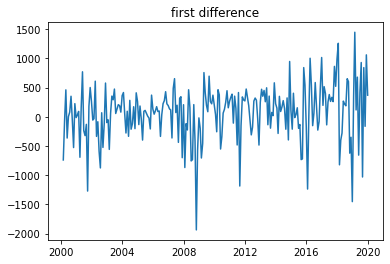

In [54]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
plt.figure()
plt.plot(stock_diff)
plt.title('first difference')
plt.show()

<AxesSubplot:xlabel='data'>

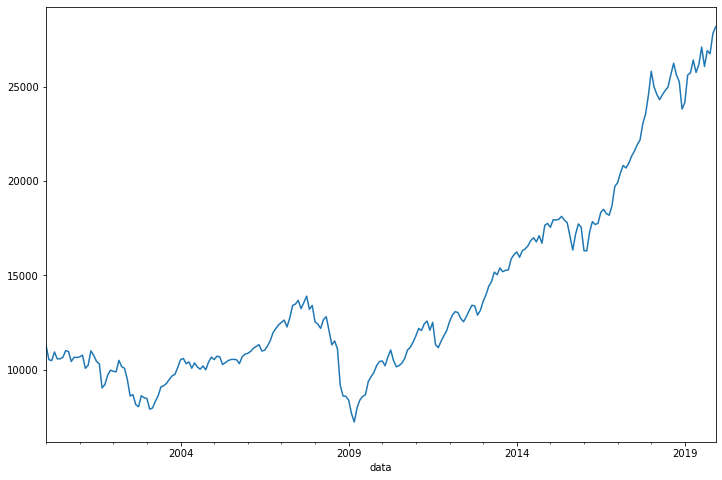

In [55]:
stock_train.plot(figsize=(12,8))

In [95]:
model = ARIMA(stock_train, order=(1,0,8))
result = model.fit()

In [96]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  240
Model:                 ARIMA(1, 0, 8)   Log Likelihood               -1803.151
Date:                Sun, 01 May 2022   AIC                           3628.302
Time:                        22:44:42   BIC                           3666.589
Sample:                    01-31-2000   HQIC                          3643.729
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.404e+04   1.71e+04      0.822      0.411   -1.94e+04    4.75e+04
ar.L1          0.9974      0.006    171.304      0.000       0.986       1.009
ma.L1          0.1637      0.067      2.457      0.014       0.033       0.294
ma.L2         -0.0547      0.055     -1.001      0.317      -0.162       0.052
ma.L3          0.0394      0.070      0.563      0.574      -0.098       0.176
ma.L4         -0.0306      0.068     -0.451      0.652      -0.164       0.102
ma.L5          0.2104      0.065      3.244      0.001       0.083       0.338
ma.L6         -0.0326      0.062     -0.525      0.600      -0.154       0.089
ma.L7         -0.0131      0.065     -0.201      0.841      -0.140       0.114
ma.L8          0.1676      0.066      2.525      0.012       0.038       0.298
sigma2      1.846e+05   1.36e+04     13.603      0.000    1.58e+05    2.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
pred = result.predict(250,288,dynamic = True)
pred

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2020-11-30    27975.454195
2020-12-31    27939.063147
2021-01-31    27902.767113
2021-02-28    27866.565847
2021-03-31    27830.459100
2021-04-30    27794.446625
2021-05-31    27758.528177
2021-06-30    27722.703511
2021-07-31    27686.972380
2021-08-31    27651.334541
2021-09-30    27615.789751
2021-10-31    27580.337766
2021-11-30    27544.978344
2021-12-31    27509.711244
2022-01-31    27474.536224
2022-02-28    27439.453044
2022-03-31    27404.461464
2022-04-30    27369.561246
2022-05-31    27334.752149
2022-06-30    27300.033938
2022-07-31    27265.406373
2022-08-31    27230.869220
2022-09-30    27196.422240
2022-10-31    27162.065200
2022-11-30    27127.797864
2022-12-31    27093.619999
2023-01-31    27059.531369
2023-02-28    27025.531744
2023-03-31    26991.620889
2023-04-30    26957.798573
2023-05-31    26924.064566
2023-06-30    26890.418637
2023-07-31    26856.860554
2023-08-31    26823.390091
2023-09-30    26790.007016
2023-10-31    26756.711103
2023-11-30    26723.502124
2

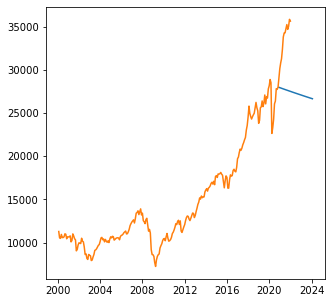

In [100]:
plt.figure(figsize=(5,5))
plt.plot(pred)
plt.plot(stock_week)
plt.show()